In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/diabetes__1_.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## regression decision tree

In [ ]:
x=df.loc[:, df.columns !="Outcome"]

In [ ]:
y=df["Outcome"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn import tree

In [ ]:
regtree=tree.DecisionTreeRegressor(max_depth=3)

In [ ]:
regtree.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
mean_squared_error(y_test,regtree.predict(x_test))

0.15562875215194477

In [ ]:
r2_score(y_test,regtree.predict(x_test))

0.2660784477956806

## plotting decision tree

In [ ]:
dot_data = tree.export_graphviz(regtree,out_file=None)

In [ ]:
from IPython.display import Image

In [ ]:
import pydotplus

In [ ]:
graph=pydotplus.graph_from_dot_data(dot_data)

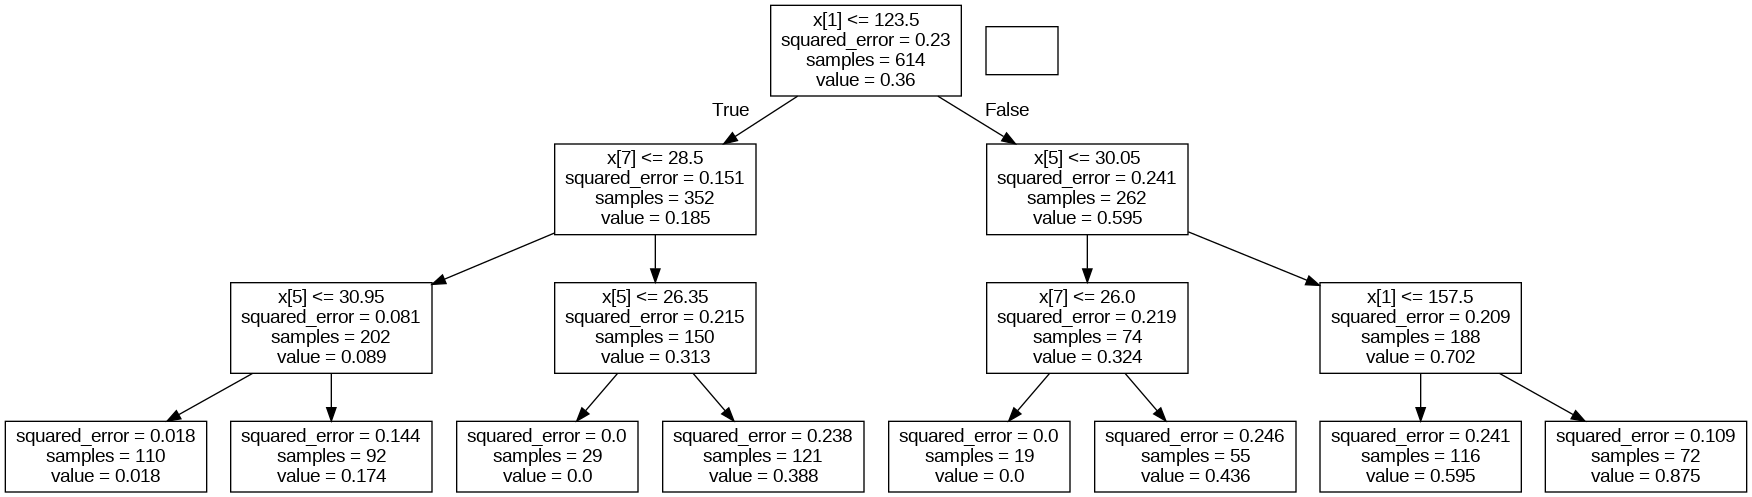

In [ ]:
Image(graph.create_png())

## Pruning tree

In [ ]:
regtree1=tree.DecisionTreeRegressor(max_depth=3)

In [ ]:
regtree1.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [ ]:
dot_data=tree.export_graphviz(regtree1,out_file=None,feature_names=x_train.columns,filled=True)

In [ ]:
r2_score(y_test,regtree1.predict(x_test))

0.2660784477956806

In [ ]:
graph1=pydotplus.graph_from_dot_data(dot_data)

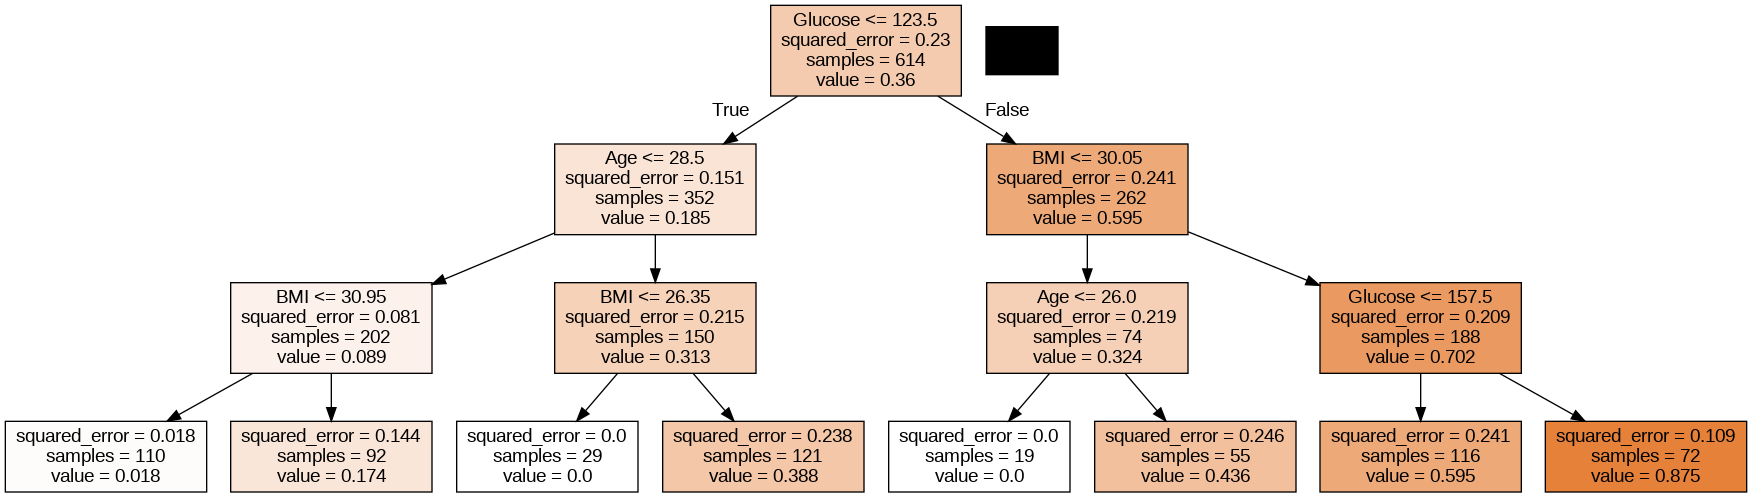

In [ ]:
Image(graph1.create_png())

Minimum observation at leaf node

In [ ]:
regtree2=tree.DecisionTreeRegressor(min_samples_leaf=30,max_depth=4)

In [ ]:
regtree2.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=30)

In [ ]:
dot_data=tree.export_graphviz(regtree2,out_file=None,feature_names=x_train.columns,filled=True)

In [ ]:
grapgh2=pydotplus.graph_from_dot_data(dot_data)

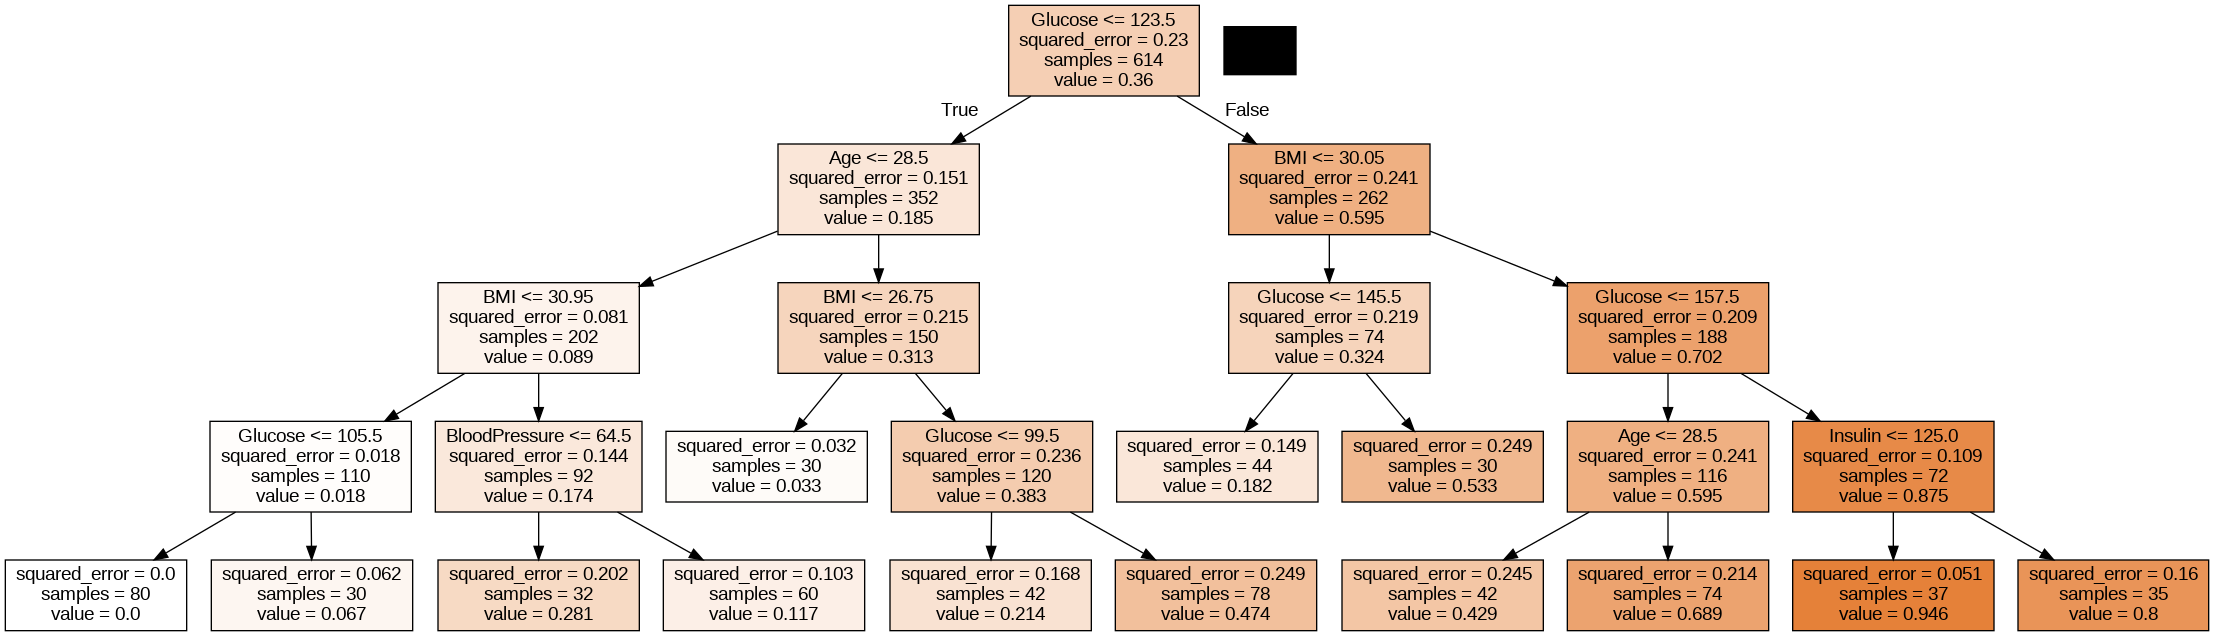

In [ ]:
Image(grapgh2.create_png())

In [ ]:
r2_score(y_test,regtree2.predict(x_test))

0.29721027051155224

# Classification tree

In [ ]:
clf_tree=tree.DecisionTreeClassifier(max_depth=3)

In [ ]:
clf_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
y_test_pred=clf_tree.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
confusion_matrix(y_test,y_test_pred)

array([[93, 14],
       [23, 24]])

In [ ]:
accuracy_score(y_test,y_test_pred)

0.7597402597402597

In [ ]:
dot_data= tree.export_graphviz(clf_tree,out_file=None,feature_names=x_train.columns,filled=True)

In [ ]:
graph=pydotplus.graph_from_dot_data(dot_data)

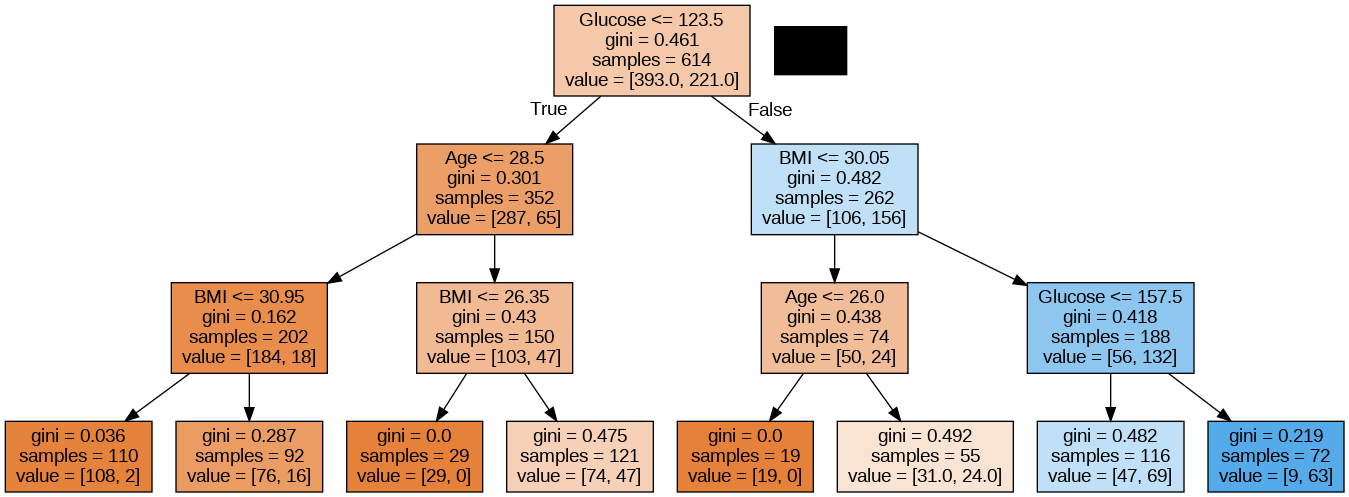

In [ ]:
Image(graph.create_png())

## controlling tree growth

In [ ]:
clf_tree1=tree.DecisionTreeClassifier(min_samples_leaf=30,max_depth=4)

In [ ]:
clf_tree1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=30)

In [ ]:
dot_data=tree.export_graphviz(clf_tree1,out_file=None,feature_names=x_train.columns,filled=True)

In [ ]:
graph1=pydotplus.graph_from_dot_data(dot_data)

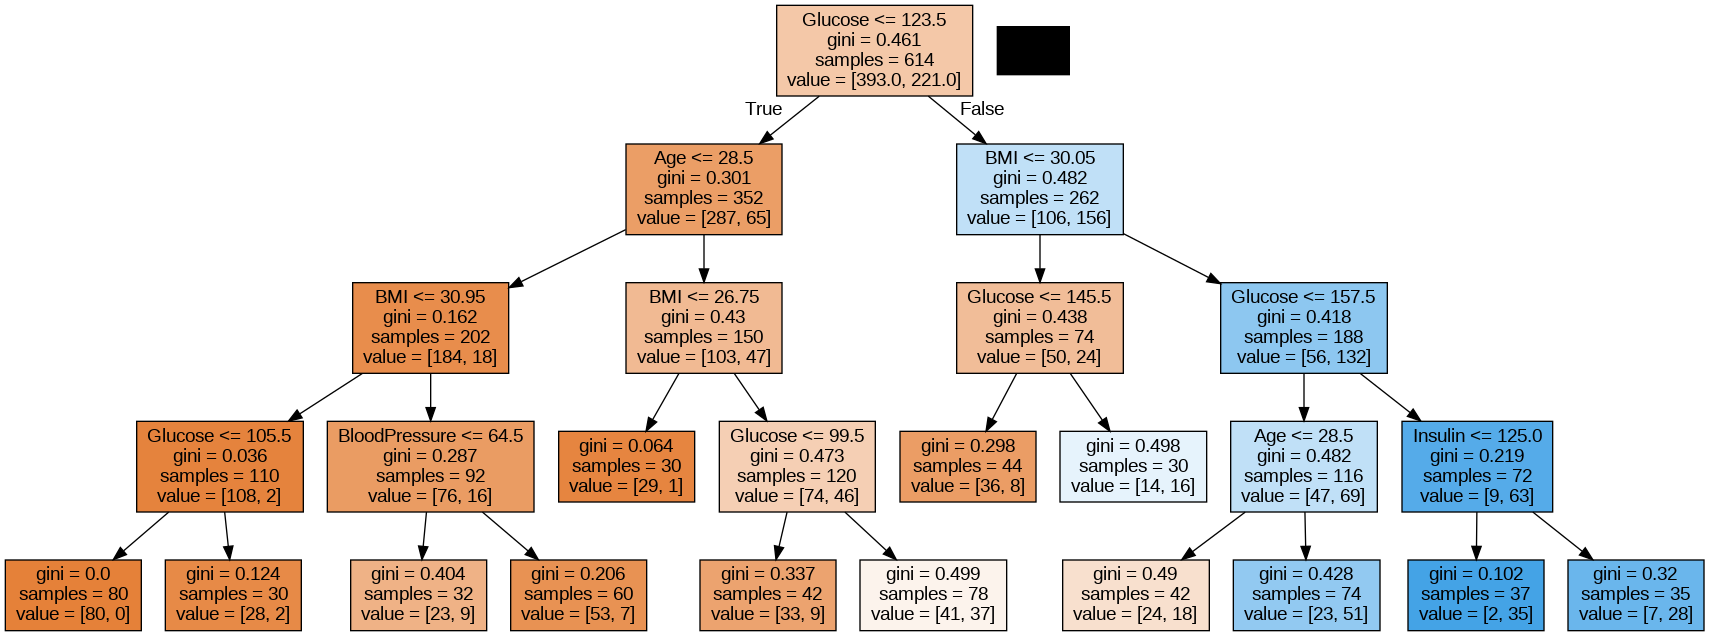

In [ ]:
Image(graph1.create_png())

In [ ]:
accuracy_score(y_test,clf_tree1.predict(x_test))

0.7792207792207793

## Ensemble methods
## Bagging

In [ ]:
from sklearn import tree

In [ ]:
clf_tree=tree.DecisionTreeClassifier()

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
bag_clf=BaggingClassifier(estimator=clf_tree,n_estimators=1000,bootstrap=True,n_jobs= -1,random_state=42)

In [ ]:
bag_clf.fit(x_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=1000,
                  n_jobs=-1, random_state=42)

In [ ]:
confusion_matrix(y_test,bag_clf.predict(x_test))

array([[92, 15],
       [13, 34]])

In [ ]:
confusion_matrix(y_train,bag_clf.predict(x_train))

array([[393,   0],
       [  0, 221]])

In [ ]:
accuracy_score(y_test,bag_clf.predict(x_test))

0.8181818181818182

## random forest method

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_clf=RandomForestClassifier(n_estimators=1000,n_jobs= -1,random_state=42)

In [ ]:
rf_clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [ ]:
confusion_matrix(y_test,rf_clf.predict(x_test))

array([[94, 13],
       [15, 32]])

In [ ]:
accuracy_score(y_test,rf_clf.predict(x_test))

0.8181818181818182

## using Grid seacrh

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
rf_clf1=RandomForestClassifier(n_estimators=1000,random_state=42)

In [ ]:
params_grid={'max_features':[4,5,6,7,8,9,10],
             'min_samples_split':[2,3,10]}

In [ ]:
grid_search=GridSearchCV(rf_clf1,params_grid,cv=5,scoring='accuracy')

In [ ]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=1000,
                                              random_state=42),
             param_grid={'max_features': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 10]},
             scoring='accuracy')

In [ ]:
grid_search.best_params_

{'max_features': 8, 'min_samples_split': 2}

In [ ]:
cvrf_clf=grid_search.best_estimator_

In [ ]:
confusion_matrix(y_test,cvrf_clf.predict(x_test))

array([[92, 15],
       [13, 34]])

In [ ]:
accuracy_score(y_test,cvrf_clf.predict(x_test))

0.8181818181818182

## Boosting method
## xg boost (mostly preferred)


In [ ]:
import xgboost as xgb

In [ ]:
xgb_clf=xgb.XGBClassifier(max_depth=5,n_estimators=10000,learning_rate=0.3,n_jobs=-1)

In [ ]:
xgb_clf.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10000, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
accuracy_score(y_test,xgb_clf.predict(x_test))

0.7727272727272727

In [ ]:
confusion_matrix(y_test,xgb_clf.predict(x_test))

array([[86, 21],
       [14, 33]])

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

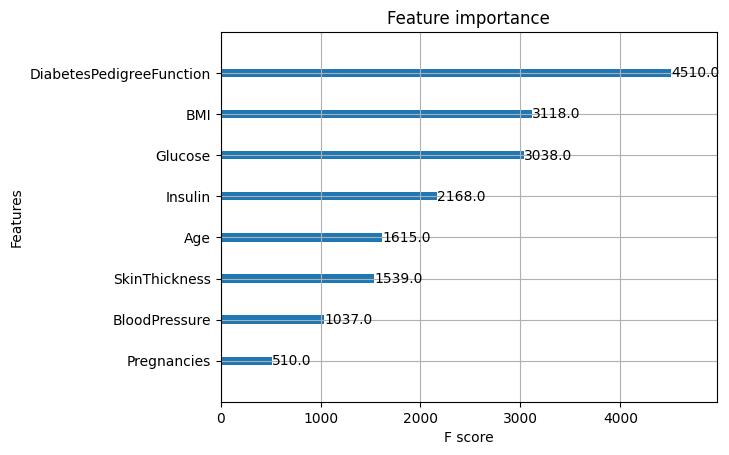

In [ ]:
xgb.plot_importance(xgb_clf)